In [ ]:
#Resume Phrase Matcher code
!pip install PyPDF2

In [1]:
#importing all required libraries

import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher


In [5]:
#Function to read resumes from the folder one by one
mypath='NLP_Resume/Candidate_Resume' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
onlyfiles

['NLP_Resume/Candidate_Resume\\Resume.pdf']

In [8]:
def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        print (t)
        text.append(t)
    return text

#function to read resume ends

In [16]:
keyword_dict = pd.read_csv('NLP_Resume/Candidate_Resume/template_new.csv')
stats_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
stats_words

[svm, random forest, decision trees]

In [19]:
list(nlp.vocab.strings)

['""',
 '#',
 '$',
 "''",
 ',',
 '-LRB-',
 '-RRB-',
 '.',
 ':',
 'ADD',
 'AFX',
 'BES',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'GW',
 'HVS',
 'HYPH',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NFP',
 'NIL',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SP',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB',
 'XX',
 '_SP',
 '``',
 'that',
 'if',
 'as',
 'because',
 'while',
 'since',
 'like',
 'so',
 'than',
 'whether',
 'although',
 'though',
 'unless',
 'once',
 'cause',
 'upon',
 'till',
 'whereas',
 'whilst',
 'except',
 'despite',
 'wether',
 'but',
 'becuse',
 'whie',
 'it',
 'w/out',
 'albeit',
 'save',
 'besides',
 'becouse',
 'coz',
 'til',
 'ask',
 "i'd",
 'out',
 'near',
 'seince',
 'tho',
 'sice',
 'will',
 'That',
 'If',
 'As',
 'Because',
 'While',
 'Since',
 'Like',
 'So',
 'Than',
 'Whether',
 'Although',
 'Though',
 'Unless',
 'Once',
 'Cause',
 'Upon',
 'Till',
 'Whereas',
 'Whilst',
 '

 
Abhishek Kumar 
Pandey
 
31, Beaufield Gardens, Maynooth, 
Co.Kildare, W23 Y5T7
   
 
 
+
(
353) 
892475998
 
 
 
talkabhishekpandey
@
gmail
.com
 
 
www.linkedin.com/in/talkabhishekpandey
 
https://github.com/abhishekkpandey1
  
  
 
 
 
 
Strong analytical thinker with problem
-
solving and presentation skills. Interested in the position of Data 
Scientist to utilize 
my 4 years of programming skills at Tata Consultancy Services 

Data Science and Analytics
. Bringing hands
-
on experience in using advanced statistical techni
ques and 
machine learning 
skill
s.
 
Skills
 
Programming Language: Python, R
, Java
, HTML.
 
Algorithms: Machine Learning, Deep Learning, Statistical Machine Learning
 
Database: 
Oracle 
SQL
 
Data Analytics Librari
es: Numpy, Pandas, Sklearn, Spacy, 
Keras, Tensorflow, Matplotlib.
 
Frameworks & Tools: Tableau, Jupyter, R Studio, Jenkins, Git, SVN.
 
Servers: 
Jboss, Tomcat, 
Flask
 
Operating System: Windows, Linux
 
Project
 
Amazon Reviews
 
Sentiment

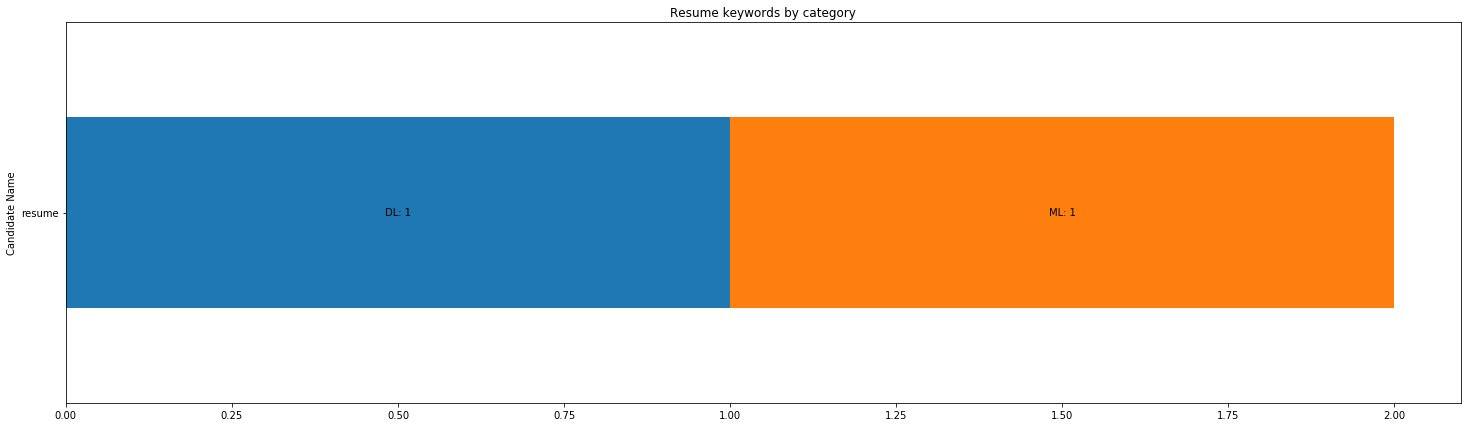

In [21]:
#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('NLP_Resume/Candidate_Resume/template_new.csv')
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    R_words = [nlp(text) for text in keyword_dict['R Language'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python Language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('R', None, *R_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        print("rule id",rule_id)
        span = doc[start : end]  # get the matched slice of the doc
        print("span",span)
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    print(keywords)
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends
        
#code to execute/call the above functions

final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)

    
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
#sample2=new_data.to_csv('sample.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()

In [25]:
keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
print(keywords)

NameError: name 'd' is not defined